In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Admin\Downloads\Swarm_Behaviour.csv')

In [3]:
df

,x1,y1,xVel1,yVel1,xA1,yA1,xS1,yS1,xC1,yC1,...,yVel200,xA200,yA200,xS200,yS200,xC200,yC200,nAC200,nS200,Swarm_Behaviour
0,562.05,-0.62,-10.70,-4.33,0.00,0.00,0.0,0.0,0.00,0.00,...,-15.15,0.00,0.00,0.00,0.00,0.00,0.00,28,0,0.0
1,175.66,-57.09,2.31,-2.67,0.00,0.00,0.0,0.0,0.00,0.00,...,-3.48,0.00,0.00,0.00,0.00,0.00,0.00,4,0,0.0
2,200.16,-320.07,4.01,-6.37,0.00,0.00,0.0,0.0,0.18,-0.26,...,-9.38,0.00,0.00,0.00,0.00,-0.11,-0.30,15,1,0.0
3,316.99,-906.84,0.85,9.17,-0.17,1.03,0.0,0.0,0.00,0.00,...,10.39,-0.26,1.01,0.00,0.00,0.00,0.00,16,0,0.0
4,1277.68,908.54,-2.02,8.23,-1.00,1.00,0.0,0.0,0.00,0.00,...,13.91,-1.00,0.00,3.21,15.67,0.00,0.00,12,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23304,-225.85,128.99,12.19,-7.56,-1.00,0.00,0.0,0.0,0.00,0.00,...,-5.06,-1.00,-1.00,-3.99,0.21,0.00,0.00,17,1,0.0
23305,-1352.02,-233.03,-0.86,-4.37,-0.07,-0.55,0.0,0.0,0.28,0.02,...,-12.41,-0.15,-0.70,0.00,0.00,0.02,0.07,69,1,0.0
23306,-1360.61,-778.11,-2.89,-1.17,0.00,0.00,0.0,0.0,0.00,0.00,...,-14.78,0.00,0.00,0.00,0.00,0.00,0.00,20,1,0.0
23307,987.11,615.69,-5.61,-2.92,-1.00,-1.00,0.0,0.0,0.00,0.00,...,9.78,-1.00,-1.00,0.00,0.00,0.00,0.00,29,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Columns: 2401 entries, x1 to Swarm_Behaviour
dtypes: float64(2001), int64(400)
memory usage: 427.0 MB


In [5]:
df.isna().sum().sum()

0

In [6]:
df.nunique().sort_values()

Swarm_Behaviour        2
nS161                 16
nS11                  19
nS55                  23
nS137                 24
                   ...  
x33                17056
x74                17063
x162               17074
x19                17082
x58                17111
Length: 2401, dtype: int64

In [7]:
X = df.drop('Swarm_Behaviour',axis=1)
y = df['Swarm_Behaviour']

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()

In [10]:
X = sc.fit_transform(X)

In [11]:
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=777)

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
log_reg = LogisticRegression()

In [16]:
log_reg.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y_pred = log_reg.predict(X_test)

In [21]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      5042
         1.0       0.83      0.83      0.83      2650

    accuracy                           0.88      7692
   macro avg       0.87      0.87      0.87      7692
weighted avg       0.88      0.88      0.88      7692



In [23]:
f1_logreg = f1_score(y_test,y_pred)
f1_logreg

0.8321029717963279

In [24]:
confusion_matrix(y_test,y_pred)

array([[4607,  435],
       [ 452, 2198]], dtype=int64)

# Naive Bayes'

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb = GaussianNB()

In [27]:
nb.fit(X_train,y_train)

GaussianNB()

In [28]:
y_pred2 = nb.predict(X_test)

In [29]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.93      0.21      0.34      5042
         1.0       0.39      0.97      0.56      2650

    accuracy                           0.47      7692
   macro avg       0.66      0.59      0.45      7692
weighted avg       0.75      0.47      0.42      7692



In [30]:
f1_nb = f1_score(y_test,y_pred2)
f1_nb 

0.5588714053174173

In [31]:
confusion_matrix(y_test,y_pred2)

array([[1052, 3990],
       [  75, 2575]], dtype=int64)

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred3 = knn.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92      5042
         1.0       0.84      0.84      0.84      2650

    accuracy                           0.89      7692
   macro avg       0.88      0.88      0.88      7692
weighted avg       0.89      0.89      0.89      7692



In [37]:
f1_knn = f1_score(y_test,y_pred3)
f1_knn

0.8407330436425468

In [38]:
confusion_matrix(y_test,y_pred3)

array([[4624,  418],
       [ 425, 2225]], dtype=int64)

# Decision Tree - Gini Index

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dc = DecisionTreeClassifier()

In [41]:
dc.fit(X_train,y_train)

DecisionTreeClassifier()

In [42]:
y_pred4 = dc.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      5042
         1.0       0.83      0.80      0.81      2650

    accuracy                           0.87      7692
   macro avg       0.86      0.86      0.86      7692
weighted avg       0.87      0.87      0.87      7692



In [44]:
f1_dt = f1_score(y_test,y_pred4)
f1_dt

0.8131235610130468

# Decision Tree - Entropy

In [45]:
dc2 = DecisionTreeClassifier(criterion='entropy')

In [46]:
dc2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
y_pred5 = dc2.predict(X_test)

In [48]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      5042
         1.0       0.82      0.81      0.81      2650

    accuracy                           0.87      7692
   macro avg       0.86      0.86      0.86      7692
weighted avg       0.87      0.87      0.87      7692



In [49]:
f1_dt_ent = f1_score(y_test,y_pred5)
f1_dt_ent

0.8149553995065477

# Final Analysis

In [51]:
import matplotlib.pyplot as plt

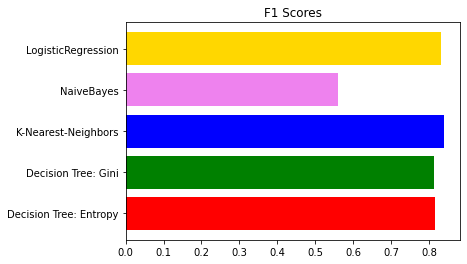

In [71]:
plt.title('F1 Scores')
plt.barh(['Decision Tree: Entropy','Decision Tree: Gini','K-Nearest-Neighbors','NaiveBayes','LogisticRegression'],[f1_dt_ent,f1_dt,f1_knn,f1_nb,f1_logreg],color=['red','green','blue','violet','gold'])
plt.show()

With respect to F-1 Scores,




K Nearest neighbours performed the best

Naive Bayes' Classifier performed the worst